In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
from py_unsio import *
import wkbl
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()


In [2]:
path = "/data/POL/HALOA/output_01274"
#path = "/media/arturo/ARTUROTECA/OUTPUTS/HaloB/output_00417"
myhalo = wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)

loading Dark matter..
loading Stars..
loading Gas..


In [3]:
#this will center the data in the  point wiht he highest density of stars in the galaxy
# first calucilate the density
ok,rho,_= CF.getDensity(np.array(myhalo.st.pos3d.reshape(len(myhalo.st.pos3d)*3),dtype=np.float32), myhalo.st.mass)
# now define de coordinates of the point with the highest density
centro_rho = myhalo.st.pos3d[np.where(rho == rho.max())][0]
# and finally recenter the data
myhalo.center_shift(centro_rho)

In [5]:
# now you calculate the virial radius and take all the data inside n-times the virial radius(r200)
# the number is the distance in kpc at which if rvir is not found the rutine will stop
myhalo.r_virial(600,n=1.5)
myhalo.redefine(1.5)

starting
stackted
start histogram


/home/arturo/Documents/git/WKBL/wkbl/astro/galaxy_peeker.py:78: RuntimeWarning: divide by zero encountered in divide
  rho_s = np.cumsum(mhist) / vol_bin


 done
rotated


/home/arturo/Documents/git/WKBL/wkbl/astro/_stars.py:58: RuntimeWarning: invalid value encountered in divide
  self.vR = (self.vel3d[:,0]*self.pos3d[:,0] + self.vel3d[:,1]*self.pos3d[:,1])/ self.R
/home/arturo/Documents/git/WKBL/wkbl/astro/_stars.py:59: RuntimeWarning: invalid value encountered in divide
  self.vr = (self.vel3d[:,0]*self.pos3d[:,0] + self.vel3d[:,1]*self.pos3d[:,1] + self.vel3d[:,2]*self.pos3d[:,2])/ self.r
/home/arturo/Documents/git/WKBL/wkbl/astro/_stars.py:60: RuntimeWarning: invalid value encountered in divide
  self.vphi = (-self.vel3d[:,0]*self.pos3d[:,1] + self.vel3d[:,1]*self.pos3d[:,0] )/ self.R


| r_200 = 239.6484375
| Diagonal matrix computed 
|    |18, 0, 0|
| D =| 0,15, 0|
|    | 0, 0, 3|


In [6]:
# at this point you should hav aacces to things like
#        _
#       |.dm (dark matter)
#myhalo< .st (stars)
#       |.gs (gas)
#        -
# and inside each


#====== stars ======#
myhalo.st.pos3d # positions
myhalo.st.vel3d # velocities
myhalo.st.mass  # masses
#=== dark matter ===#
myhalo.dm.pos3d # positions
myhalo.dm.vel3d # velocities
myhalo.dm.mass  # masses
#======  gas  ======#
myhalo.gs.pos3d # positions
myhalo.gs.vel3d # velocities
myhalo.gs.mass  # masses

array([  8.51002422e+04,   8.42778203e+04,   9.16959609e+04, ...,
         3.12641764e+00,   2.95267129e+00,   3.03009367e+00], dtype=float32)

In [7]:
# tricks
# to get one array with only the x possition

x = myhalo.st.pos3d[:,0]
y = myhalo.st.pos3d[:,1]
z = myhalo.st.pos3d[:,2]

# so if you want the radius
r = np.sqrt(x**2 + y**2 + z**2)

# but this already exist and is called
myhalo.st.r # the radius in spherical

array([ 236.48341267,   43.3842504 ,  217.00044039, ...,  136.90490701,
         83.42288054,  114.94941519])

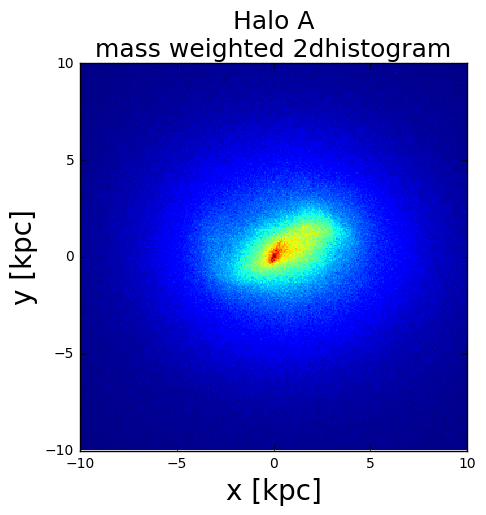

In [15]:
# one cool plot because why not
edges = np.linspace(-10,10,300)
H, xedges, yedges = np.histogram2d(myhalo.st.pos3d[:,0], myhalo.st.pos3d[:,1], bins=(edges, edges),weights=myhalo.st.mass)
H = H.T
fig,ax = plt.subplots(figsize=[5,5])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
#plt.axis('off')
ax.set_title("Halo A\nmass weighted 2dhistogram",fontsize=18)
ax.set_xlabel("x [kpc]" , fontsize=20)
ax.set_ylabel("y [kpc]" , fontsize=20)
ax.imshow(H, interpolation='nearest', origin='low',
          extent=[edges[0], edges[-1], edges[0], edges[-1]])